<a href="https://colab.research.google.com/github/ChauNgocHoang/Chau-Ngoc-Hoang/blob/main/khaosatluongmua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=a077f4237c6fd986c4ee8460f83cc1bb080c0651bb86c899b15e77cad5630a4a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


3.361290322580646


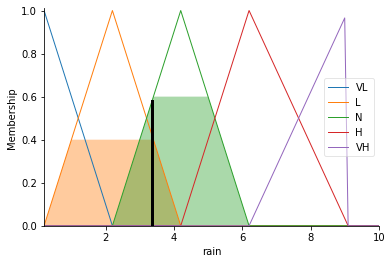

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temp = ctrl.Antecedent(np.arange(20.4,42.2,0.1),'temp')
wind = ctrl.Antecedent(np.arange(0.7,4.1,0.1), 'wind')
rain = ctrl.Consequent(np.arange(0.2,10.1,0.1), 'rain')
temp ['VL'] = fuzz.trimf(temp.universe,[20.4,20.4,25.4])
temp ['L']=  fuzz.trimf(temp.universe,[20.4,25.4,30.4])
temp ['N']= fuzz.trimf(temp.universe,[25.4,30.4,35.4])
temp ['H']= fuzz.trimf(temp.universe,[30.4,35.4,41.2])
temp ['VH']= fuzz.trimf(temp.universe,[35.4,41.2,41.2])

wind ['VL'] = fuzz.trimf(wind.universe,[0.7,0.7,1.2])
wind ['L'] = fuzz.trimf(wind.universe,[0.7,1.2,1.7])
wind ['N'] = fuzz.trimf(wind.universe,[1.2,1.7,2.3])
wind ['H'] = fuzz.trimf(wind.universe,[1.7,2.3,3.1])
wind ['VH'] = fuzz.trimf(wind.universe,[2.3,3.1,3.1])

rain['VL'] = fuzz.trimf(rain.universe,[0.2,0.2,2.2])
rain['L'] = fuzz.trimf(rain.universe,[0.2,2.2,4.2])
rain['N'] = fuzz.trimf(rain.universe,[2.2,4.2,6.2])
rain['H'] = fuzz.trimf(rain.universe,[4.2,6.2,9.1])
rain['VH'] = fuzz.trimf(rain.universe,[6.2,9.1,9.1])
#time.view()
#rice.view()
#power.view()
rule1 = ctrl.Rule(temp['VL']&wind['VL'],rain['VL'])
rule2 = ctrl.Rule(temp['VL']&wind['L'],rain['L'])
rule3 = ctrl.Rule(temp['VL']&wind['N'],rain['L'])
rule4 = ctrl.Rule(temp['VL']&wind['H'],rain['N'])
rule5 = ctrl.Rule(temp['VL']&wind['VH'],rain['N'])
rule6 = ctrl.Rule(temp['L']&wind['VL'],rain['L'])
rule7 = ctrl.Rule(temp['L']&wind['L'],rain['L'])
rule8 = ctrl.Rule(temp['L']&wind['N'],rain['N'])
rule9 = ctrl.Rule(temp['L']&wind['H'],rain['N'])
rule10 = ctrl.Rule(temp['L']&wind['VH'],rain['H'])
rule11 = ctrl.Rule(temp['N']&wind['VL'],rain['L'])
rule12 = ctrl.Rule(temp['N']&wind['L'],rain['N'])
rule13 = ctrl.Rule(temp['N']&wind['N'],rain['N'])
rule14 = ctrl.Rule(temp['N']&wind['H'],rain['H'])
rule15 = ctrl.Rule(temp['N']&wind['VH'],rain['H'])
rule16 = ctrl.Rule(temp['H']&wind['VL'],rain['N'])
rule17 = ctrl.Rule(temp['H']&wind['L'],rain['N'])
rule18 = ctrl.Rule(temp['H']&wind['N'],rain['H'])
rule19 = ctrl.Rule(temp['H']&wind['H'],rain['H'])
rule20 = ctrl.Rule(temp['H']&wind['VH'],rain['VH'])
rule21 = ctrl.Rule(temp['VH']&wind['VL'],rain['N'])
rule22 = ctrl.Rule(temp['VH']&wind['L'],rain['H'])
rule23 = ctrl.Rule(temp['VH']&wind['N'],rain['H'])
rule24 = ctrl.Rule(temp['VH']&wind['H'],rain['VH'])
rule25 = ctrl.Rule(temp['VH']&wind['VH'],rain['VH'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['temp']= 25.4
tipping.input['wind']= 1.5
tipping.compute()
print(tipping.output['rain'])
rain.view(sim=tipping)